<a href="https://colab.research.google.com/github/NayakAbhishek/NayakAbhishek/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import itertools
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
import pandas as pd
import io
import requests

file = 'https://drive.google.com/file/d/1bIASBfKdhnFxhfDSq9juqHGTGONuVLCM/view?usp=sharing'

# Extract the file ID from the Google Drive URL
file_id = file.split('/')[-2]

# Construct the download URL, ensure it downloads the file, not opens a preview
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file content
response = requests.get(download_url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the CSV file from the downloaded content using pd.read_csv
df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

In [47]:
furniture = df.loc[df['Category'] == 'Furniture']

In [48]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('01-01-2017', '9/30/2016')

In [49]:
furniture.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


EDA

In [50]:
columns = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code',
           'Region','Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(columns,axis=1,inplace=True)

In [51]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [52]:
furniture = furniture.set_index('Order Date')

In [53]:
furniture.index

Index(['01-01-2017', '01-02-2015', '01-02-2016', '01-02-2017', '01-03-2015',
       '01-03-2016', '01-04-2015', '01-05-2015', '01-06-2014', '01-07-2014',
       ...
       '9/26/2017', '9/27/2014', '9/27/2015', '9/27/2016', '9/28/2014',
       '9/28/2017', '9/29/2014', '9/29/2017', '9/30/2014', '9/30/2016'],
      dtype='object', name='Order Date', length=889)

In [54]:
import pandas as pd

# ... (your previous code to load and manipulate the furniture DataFrame)

# ... (check for 'Order Date' column and set as index - same as before)

# Convert the index to DatetimeIndex, handling multiple formats
furniture.index = pd.to_datetime(furniture.index, format='%m/%d/%Y', errors='coerce')
# We explicitly specify the format as '%m/%d/%Y' to match 'month/day/year'.
# errors='coerce' will handle any invalid dates by setting them to NaT (Not a Time)

# ... (resample, filter, and print - same as before)

In [55]:
import pandas as pd

# Assuming 'furniture' DataFrame is loaded and 'Order Date' is set as index

# Convert index to DatetimeIndex (handling potential errors)
furniture.index = pd.to_datetime(furniture.index, errors='coerce')

# Resample to monthly frequency ('MS': month start)
Y = furniture['Sales'].resample('MS').sum()

# Select data from 2017 onwards
Y['2017':]

,Sales
Order Date,
2017-01-01,3144.4520
2017-02-01,4606.7524
2017-03-01,8359.5508
2017-04-01,5975.9316
2017-05-01,8177.5214
2017-06-01,12416.8647
2017-07-01,8986.3400
2017-08-01,12758.3480
2017-09-01,16125.2240


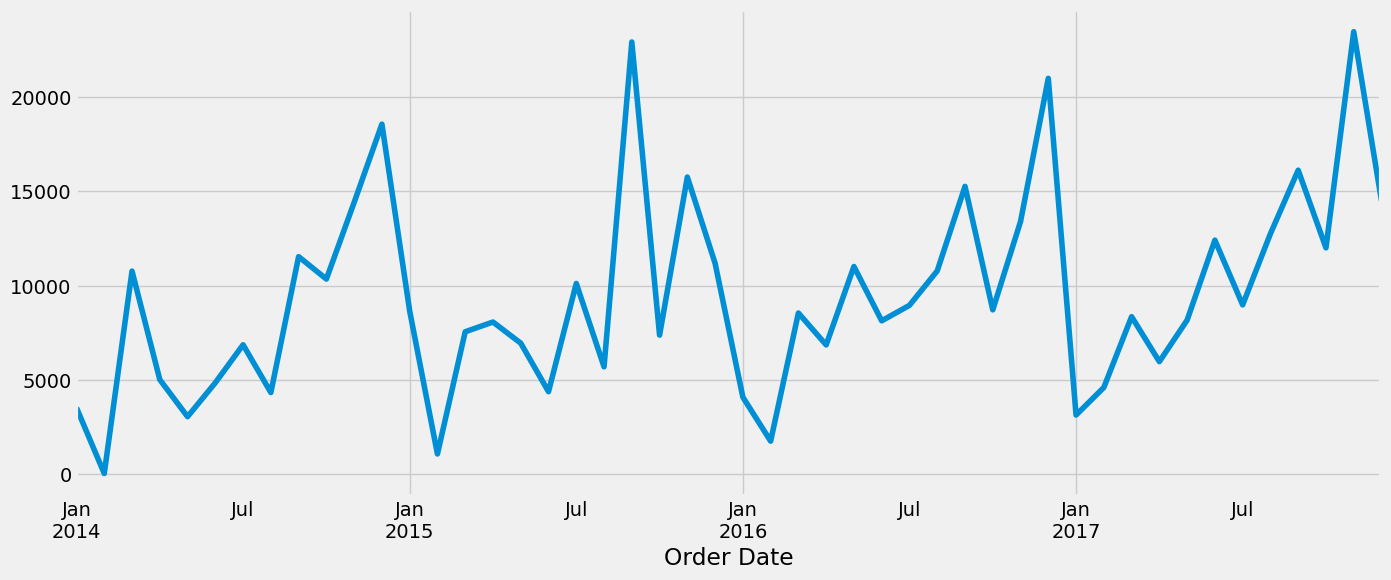

In [56]:
Y.plot(figsize=(15,6))
plt.show()

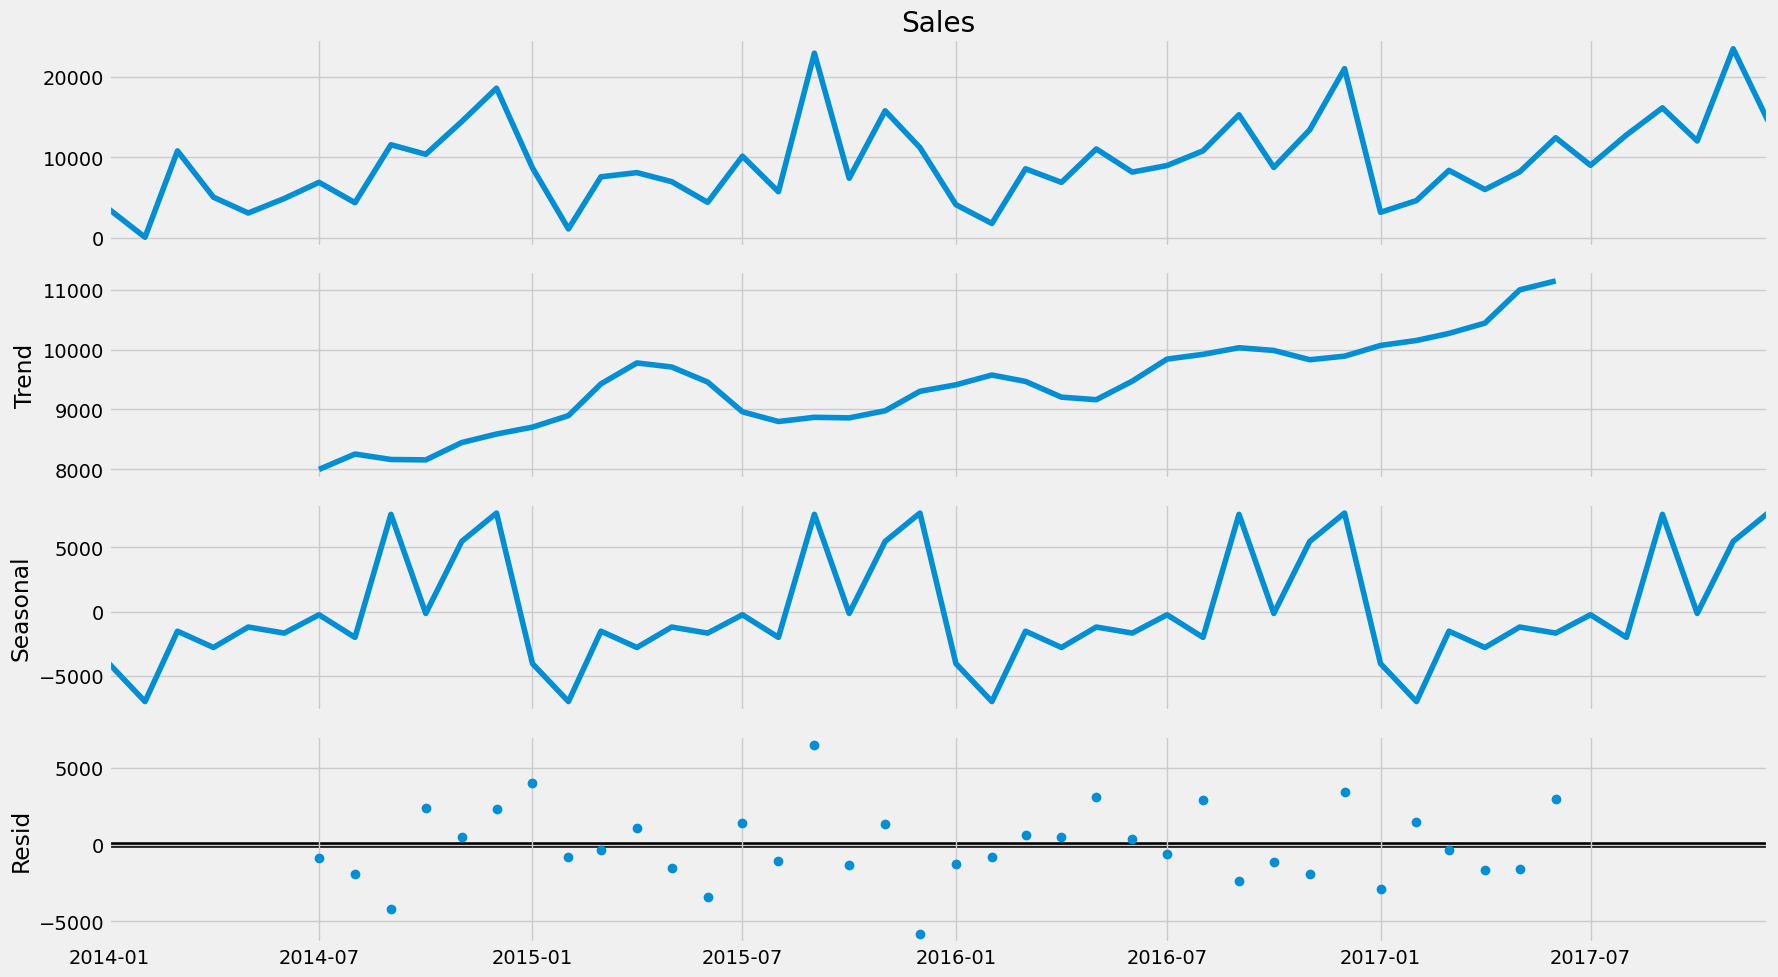

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

decomposition = sm.tsa.seasonal_decompose(Y, model = 'additive')
fig = decomposition.plot()
plt.show()

ARIMA

In [58]:
# Using ARIMA
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [59]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [60]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1009.4667530697517
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1367.1082299086966
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:688.8129036389239
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:450.45645092060295
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:710.7817523416408
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:689.6103317006824
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:465.8518038198963
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:449.837964438806
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:972.178009025953
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3865.856238727088
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:671.179588036167
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:433.8318053869227
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:747.6620289020638
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:671.6502364682416
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:467.4339701094078
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:433.5353540602693
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:942.6639872089095
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1212.319910427899
ARIMA(0, 1

In [61]:
# BEST PARAMS: ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395408083

In [62]:
mod = sm.tsa.statespace.SARIMAX(Y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4644      0.519     -0.895      0.371      -1.482       0.553
ma.L1         -0.8022      0.273     -2.942      0.003      -1.337      -0.268
ar.S.L12      -0.3795      0.324     -1.170      0.242      -1.015       0.256
sigma2      2.492e+07   9.76e-09   2.55e+15      0.000    2.49e+07    2.49e+07


Length of time series data: 48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.505e+07   1.08e+07      4.164      0.000    2.38e+07    6.63e+07


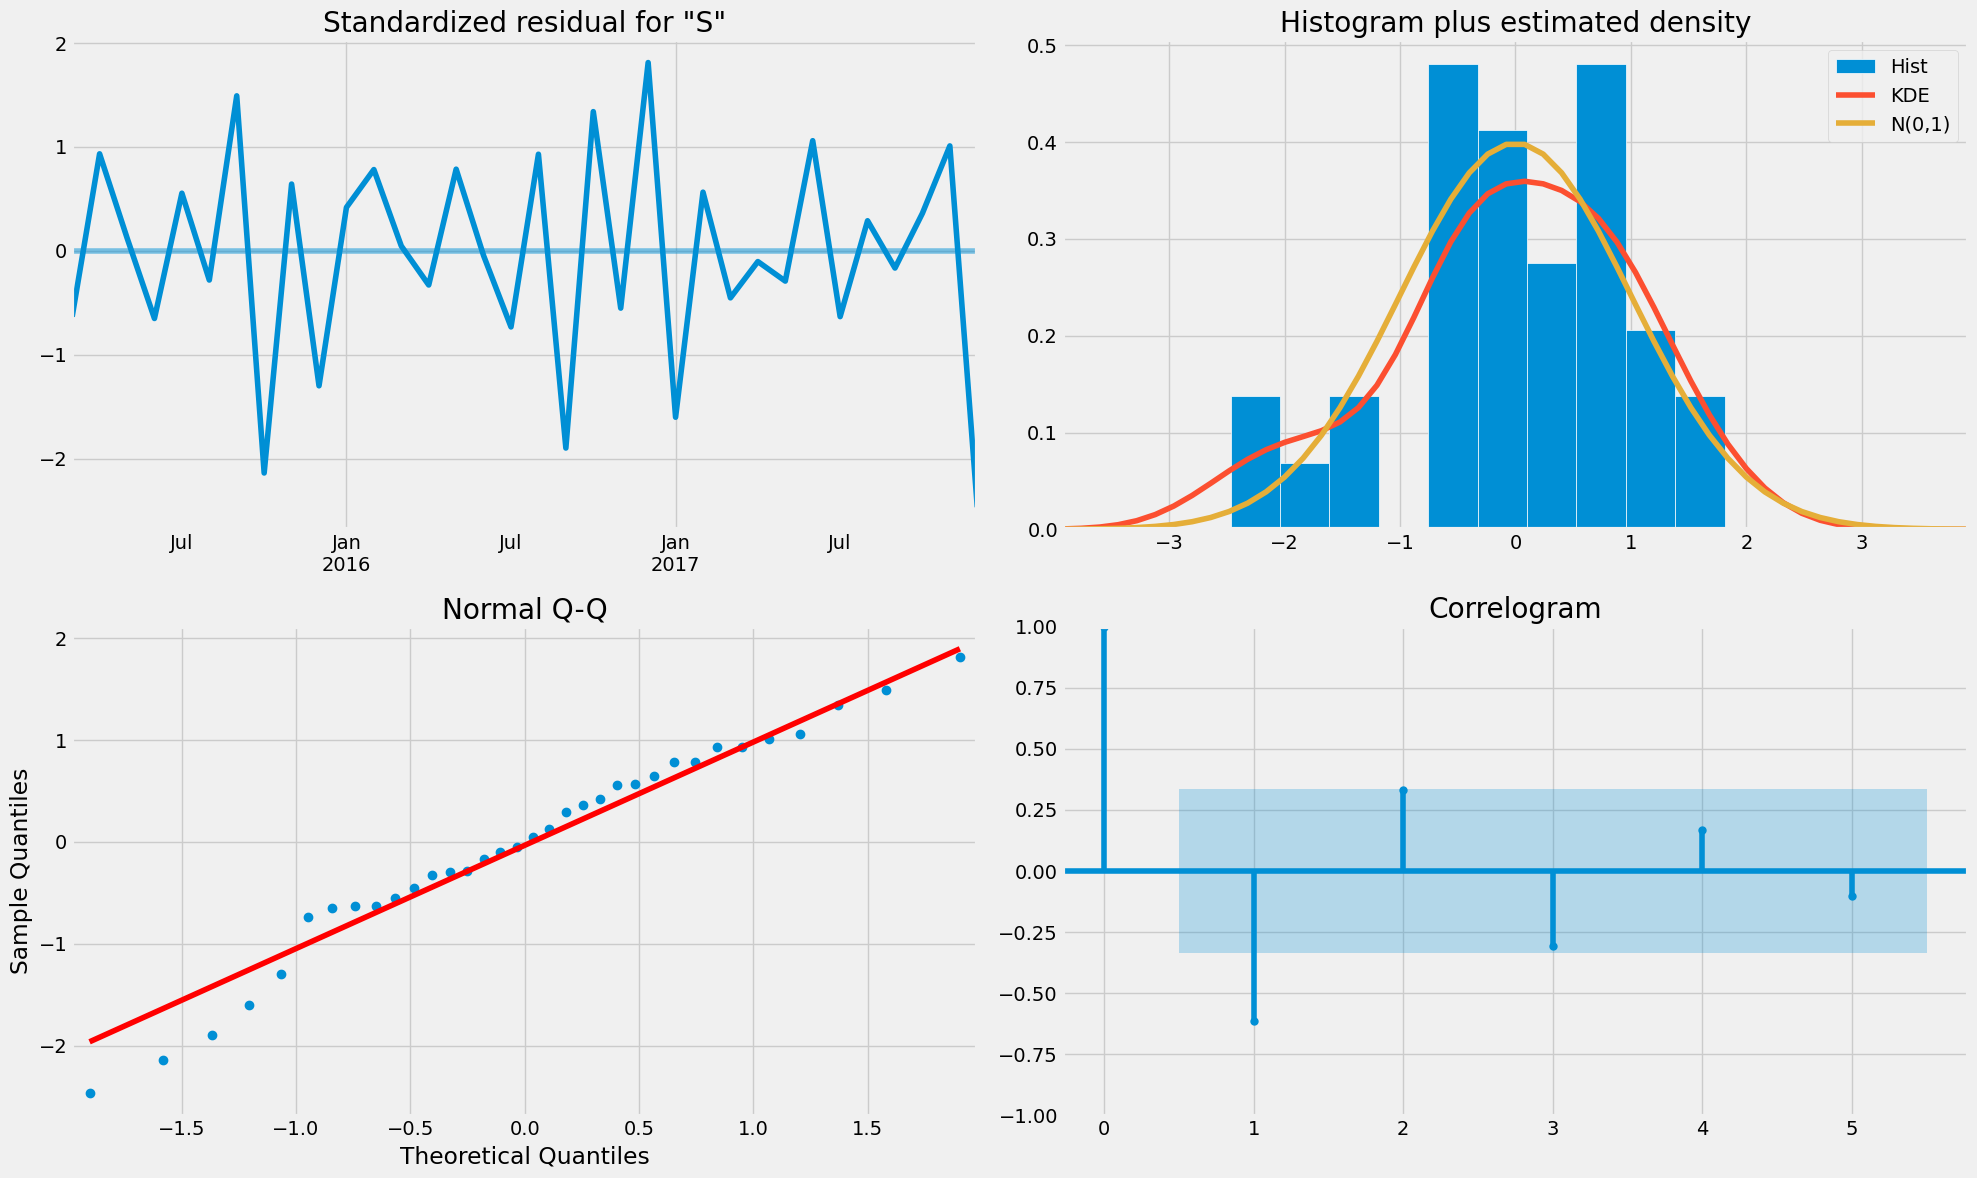

In [63]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'Y' is your time series data
# ... (your code to load and prepare Y) ...

# Check the length of your time series data
print("Length of time series data:", len(Y))

# 1. Further reduce model complexity:
mod = sm.tsa.statespace.SARIMAX(Y,
                                order=(0, 1, 0),  # Simplified to only differencing
                                seasonal_order=(0, 1, 0, 12),  # Simplified to only seasonal differencing
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

# 2. Dynamically determine maximum lags for diagnostics:
max_lags = min(5, len(Y) // 4 - 1)  # Further reduced max_lags

# 3. Generate diagnostic plots with adjusted lags:
fig = results.plot_diagnostics(figsize=(20, 12), lags=max_lags)
plt.tight_layout()
plt.show()



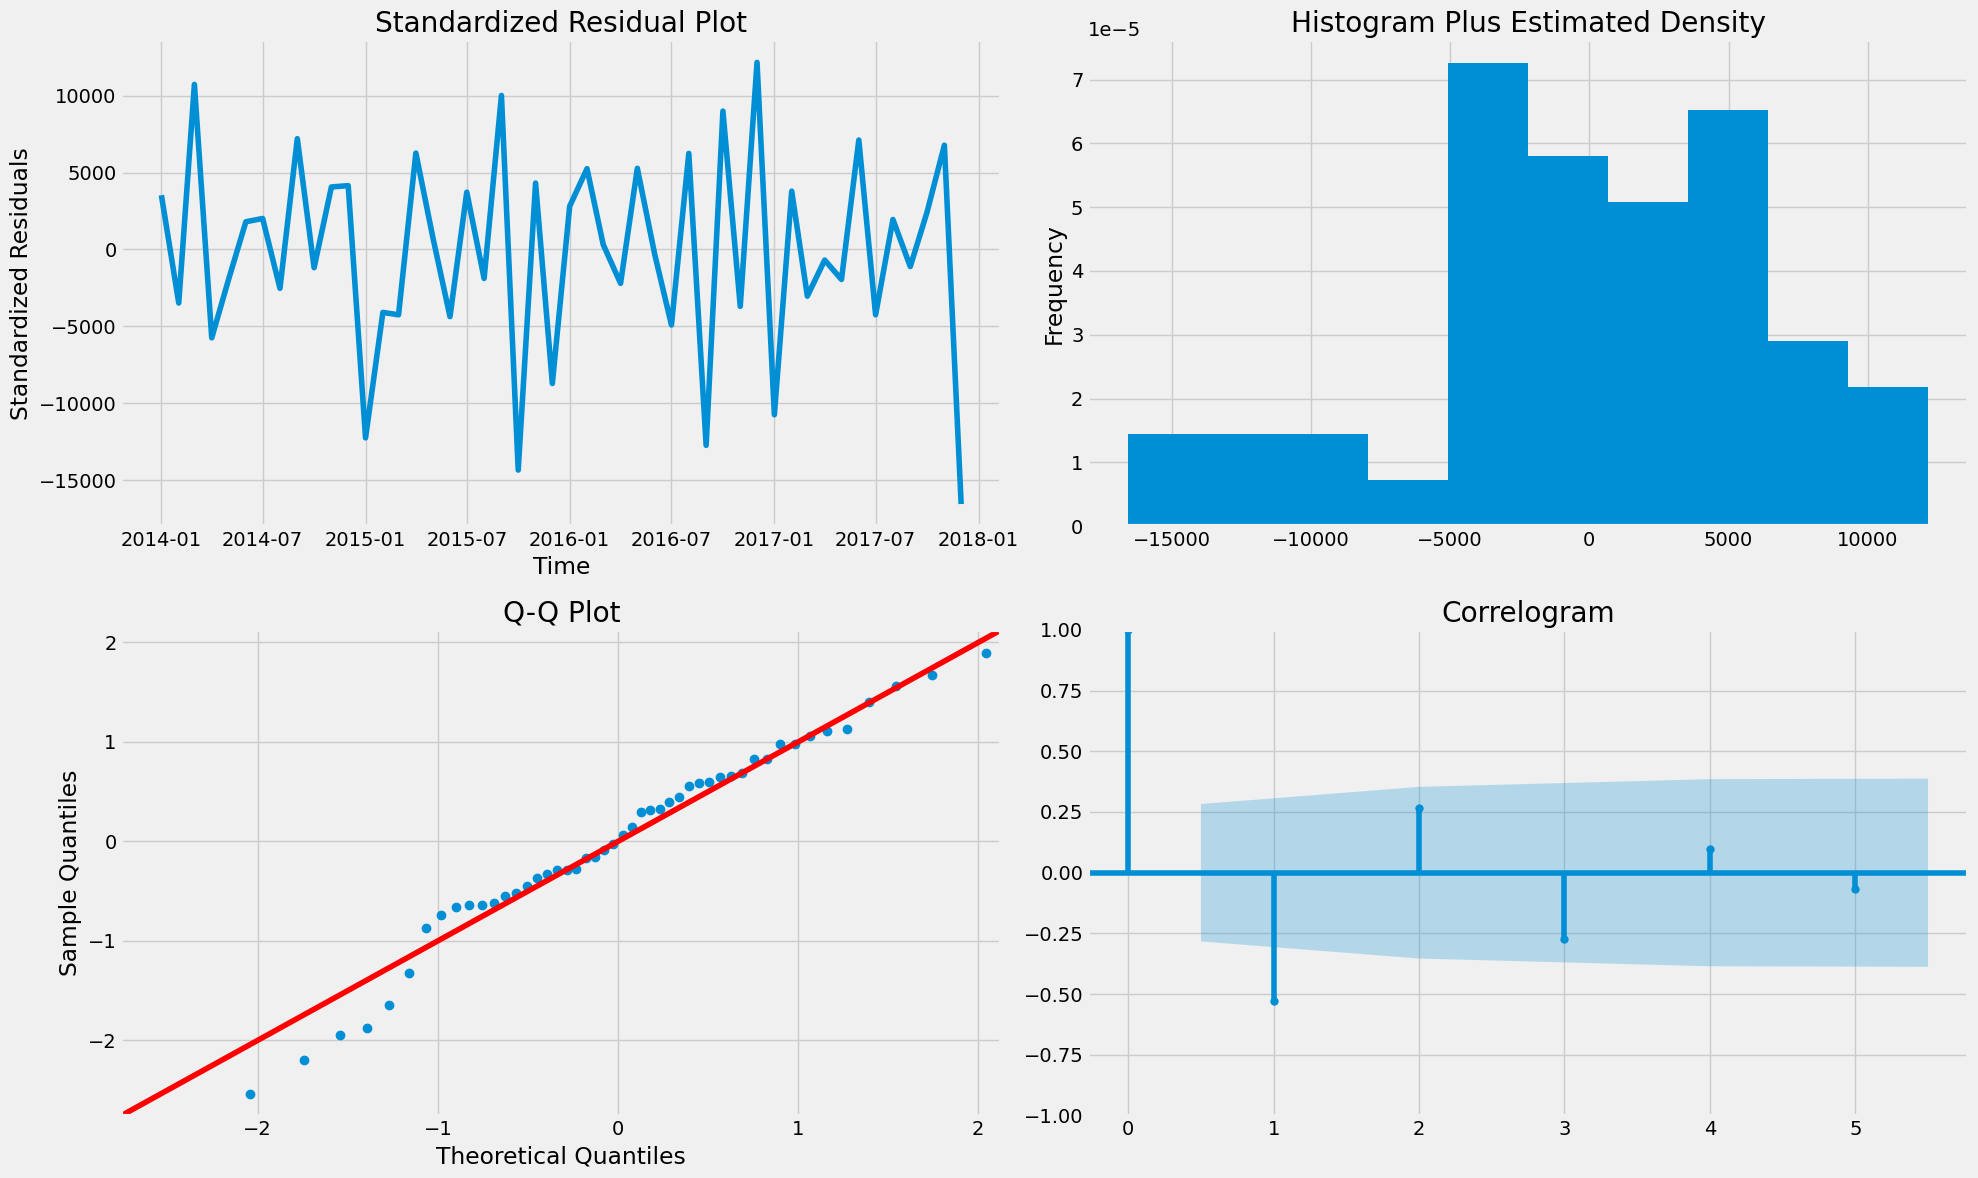

In [64]:
# ... (rest of the code remains unchanged)

# If you need individual plots:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Standardized residual plot
residuals = results.resid
ax1.plot(residuals)
ax1.set_title('Standardized Residual Plot')
ax1.set_xlabel('Time')
ax1.set_ylabel('Standardized Residuals')

# Histogram plus estimated density plot
residuals.plot(kind='hist', density=True, ax=ax2)
ax2.set_title('Histogram Plus Estimated Density')

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=ax3)
ax3.set_title('Q-Q Plot')

# Correlogram
sm.graphics.tsa.plot_acf(residuals, lags=max_lags, ax=ax4)
ax4.set_title('Correlogram')

plt.tight_layout()
plt.show()

In [65]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [66]:
pred_ci.iloc[:,1]

,upper Sales
2017-01-01,27051.993497
2017-02-01,13969.624697
2017-03-01,24553.534097
2017-04-01,19823.856497
2017-05-01,23287.402297
2017-06-01,18454.096097
2017-07-01,26393.204397
2017-08-01,23967.474497
2017-09-01,30392.763197
2017-10-01,22735.851397


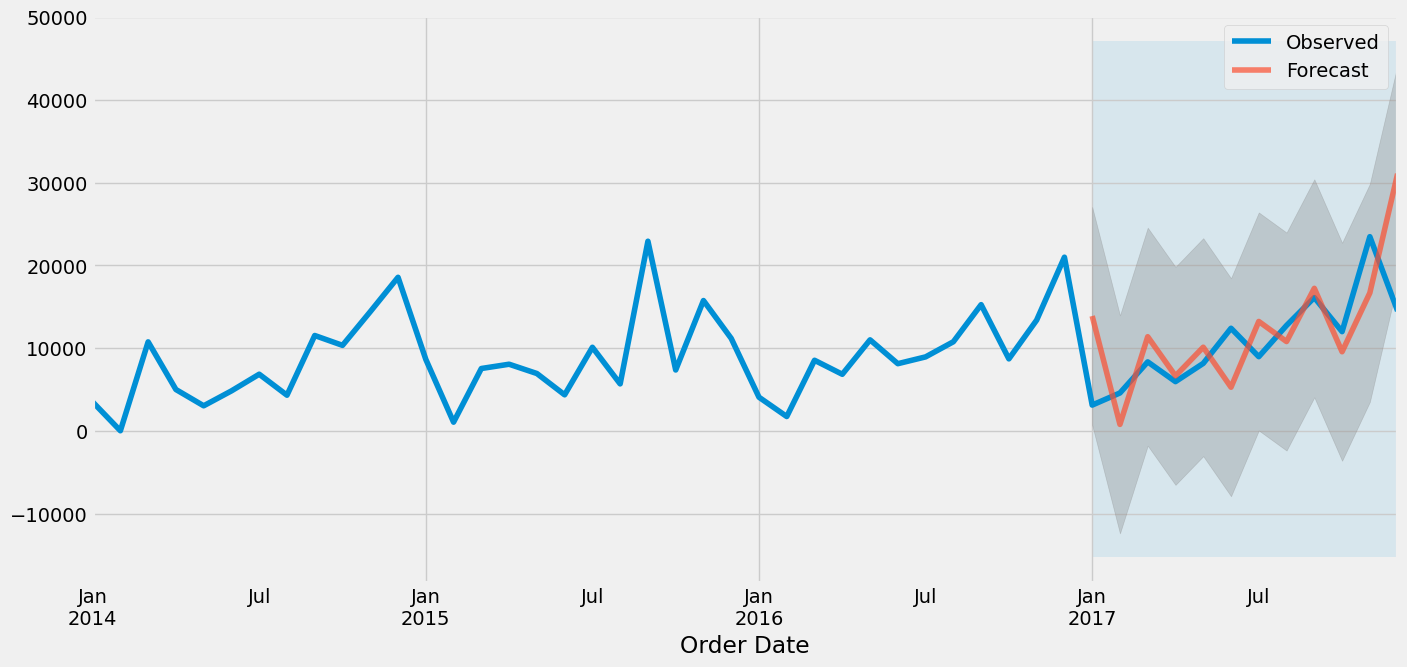

In [67]:
ax = Y['2014':].plot(figsize=(15,7),label='Observed')
pred.predicted_mean.plot(label='Forecast',alpha = 0.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color = 'grey',alpha = 0.3)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), Y.index[-1],
                 alpha=.1, zorder=-1)
plt.legend()
plt.show()

In [68]:
y_forecasted = pred.predicted_mean
# The 'Sales' column is likely the values of the Series Y, not a separate column.
y_truth = Y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 45282111.23
The Root Mean Squared Error of our forecasts is 6729.2


In [69]:
# Making forecasts

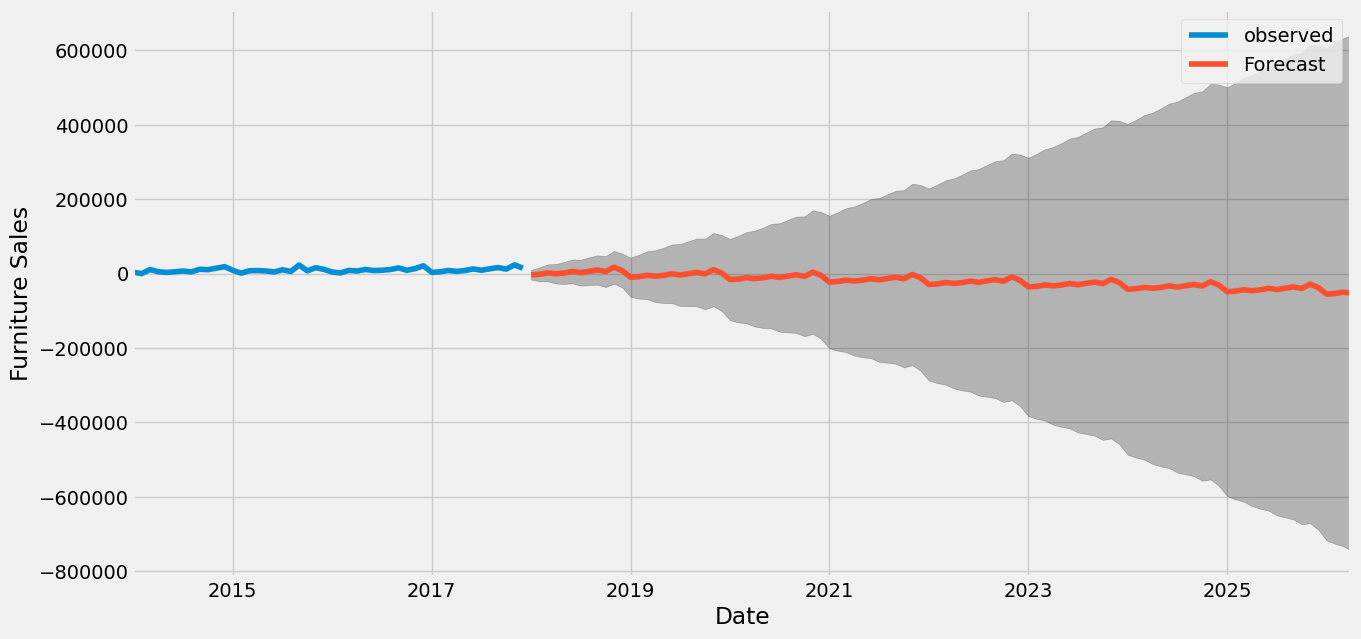

In [70]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = Y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

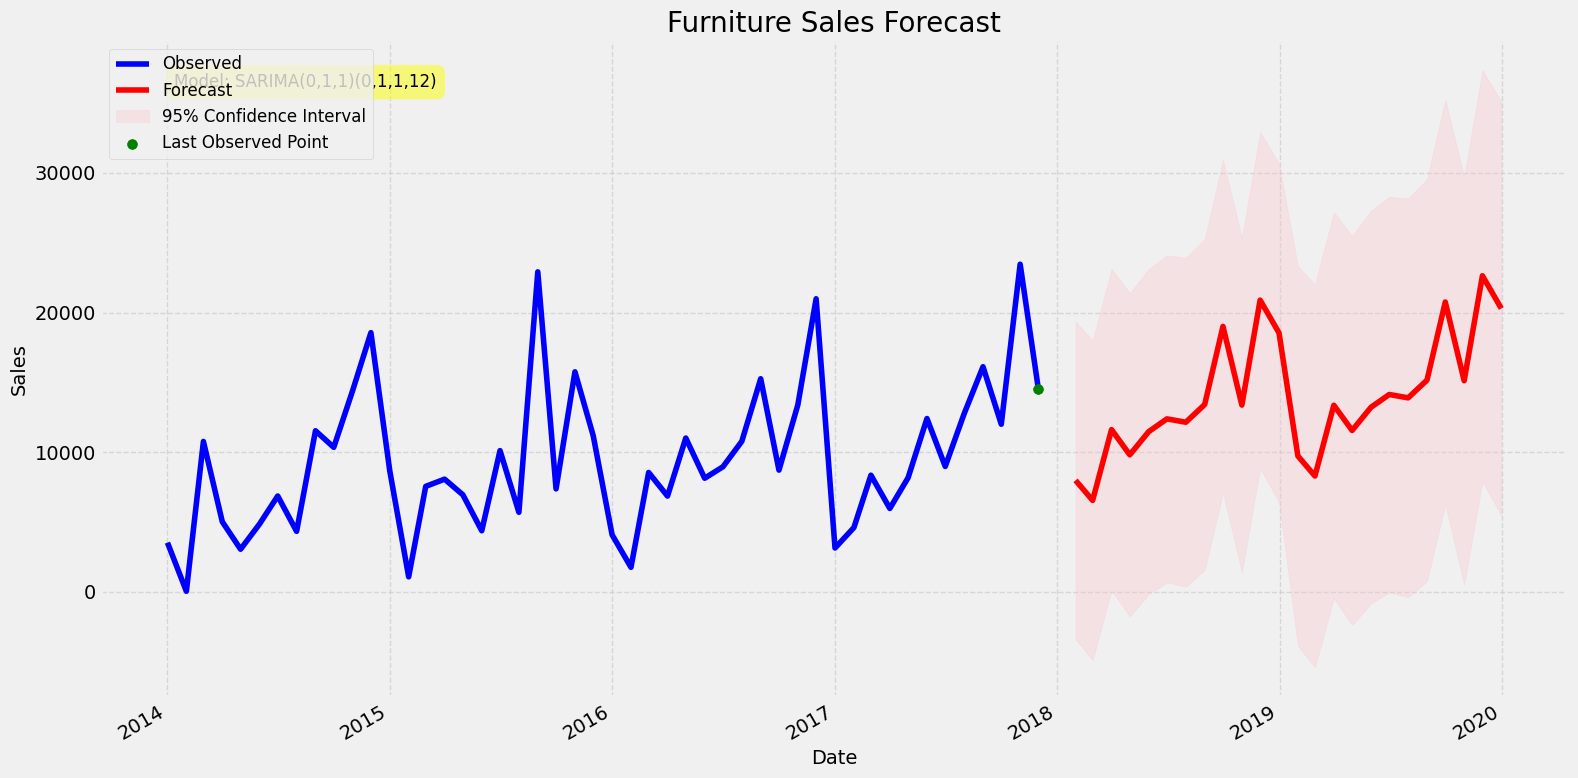

Forecast Summary:
y                   mean      mean_se  mean_ci_lower  mean_ci_upper
2018-01-01   7989.409894  5801.091677   -3380.520865   19359.340653
2018-02-01   6554.415244  5837.895052   -4887.648802   17996.479291
2018-03-01  11624.635863  5872.031081     115.666429   23133.605296
2018-04-01   9818.184053  5906.035568   -1757.432952   21393.801059
2018-05-01  11475.979595  5939.954997    -166.118268   23118.077459


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'Y' is your time series data
# ... (your code to load and prepare Y) ...

# Convert Y to DataFrame with a column named 'y'
Y = Y.to_frame(name='y')

# Convert 'y' column to numeric, handling potential errors
Y['y'] = pd.to_numeric(Y['y'], errors='coerce') #errors='coerce' will replace any non-numeric value with NaN.

# Fit the SARIMA model
model = SARIMAX(Y['y'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), # Pass the 'y' column directly
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Generate forecast
forecast_steps = 24  # Forecasting for 2 years (assuming monthly data)
forecast = results.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecast
last_date = Y.index[-1]
date_range = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(Y.index, Y['y'], label='Observed', color='blue') # Access the 'y' column for plotting
plt.plot(date_range, mean_forecast, label='Forecast', color='red')
plt.fill_between(date_range,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=0.3, label='95% Confidence Interval')
# Highlighting the last observed point
# Use Y.index[-1] and Y['y'].iloc[-1] to access the last date and value
plt.scatter(Y.index[-1], Y['y'].iloc[-1], color='green', s=50, zorder=5, label='Last Observed Point')

# Adding labels and title
plt.title('Furniture Sales Forecast', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend(loc='upper left', fontsize=12)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate the plot with model information
model_info = f"SARIMA({model.order[0]},{model.order[1]},{model.order[2]})" \
             f"({model.seasonal_order[0]},{model.seasonal_order[1]}," \
             f"{model.seasonal_order[2]},{model.seasonal_order[3]})"
plt.annotate(f"Model: {model_info}", xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             annotation_clip=False)

# Show the plot
plt.tight_layout()
plt.show()

# Print out some forecast statistics
print("Forecast Summary:")
print(forecast.summary_frame(alpha=0.05).head())

PROPHET

In [74]:
## USING PROPHET
## https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
from prophet import Prophet

In [75]:
y = Y.reset_index()

In [77]:
y = Y.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
# Since Y is already a DataFrame, remove the unnecessary .to_frame() call
# Rename the columns directly using the .rename() method

In [79]:
## Convert 'Y' (a Pandas Series) to a DataFrame with the correct column names.
# 'ds' for dates (assumed to be the index of Y)
# 'y' for values (the original values of Y)
# Y = Y.to_frame().reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})
# Since Y is already a DataFrame, remove the unnecessary .to_frame() call
# Rename the columns directly using the .rename() method
Y = Y.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Fit the Prophet model using the updated DataFrame.
model = Prophet(interval_width=0.95)
model.fit(Y)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0l4_jxsb/jd2afpyx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0l4_jxsb/cky3cm86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99614', 'data', 'file=/tmp/tmp0l4_jxsb/jd2afpyx.json', 'init=/tmp/tmp0l4_jxsb/cky3cm86.json', 'output', 'file=/tmp/tmp0l4_jxsb/prophet_modellkb3lg_7/prophet_model-20241018195144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:51:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [80]:
future_dates = model.make_future_dataframe(periods=36, freq='MS')

In [81]:
future_dates.tail()

,ds
79,2020-08-01
80,2020-09-01
81,2020-10-01
82,2020-11-01
83,2020-12-01


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

In [82]:
forecast = model.predict(future_dates)

In [83]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
79,2020-08-01,14133.592493,10990.150517,19908.948533,14133.591399,14133.593553,1308.637502,1308.637502,1308.637502,1308.637502,1308.637502,1308.637502,0.0,0.0,0.0,15442.229995
80,2020-09-01,14216.573386,12827.021633,21602.688773,14216.572235,14216.574496,3087.457071,3087.457071,3087.457071,3087.457071,3087.457071,3087.457071,0.0,0.0,0.0,17304.030457
81,2020-10-01,14296.877477,9672.193537,18256.343809,14296.876270,14296.878607,-192.881122,-192.881122,-192.881122,-192.881122,-192.881122,-192.881122,0.0,0.0,0.0,14103.996355
82,2020-11-01,14379.858370,16703.928658,24781.368320,14379.857102,14379.859574,6387.242612,6387.242612,6387.242612,6387.242612,6387.242612,6387.242612,0.0,0.0,0.0,20767.100982
83,2020-12-01,14460.162461,19724.239248,27912.073054,14460.161133,14460.163726,9339.461742,9339.461742,9339.461742,9339.461742,9339.461742,9339.461742,0.0,0.0,0.0,23799.624203


from matplotlib import pyplot as plt
_df_18['trend'].plot(kind='hist', bins=20, title='trend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['yhat_lower'].plot(kind='hist', bins=20, title='yhat_lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['yhat_upper'].plot(kind='hist', bins=20, title='yhat_upper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['trend_lower'].plot(kind='hist', bins=20, title='trend_lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='trend', y='yhat_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='yhat_lower', y='yhat_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='yhat_upper', y='trend_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='trend_lower', y='trend_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_lower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_lower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_upper']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_upper')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['additive_terms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('additive_terms')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['additive_terms_lower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('additive_terms_lower')

from matplotlib import pyplot as plt
_df_30['trend'].plot(kind='line', figsize=(8, 4), title='trend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['yhat_lower'].plot(kind='line', figsize=(8, 4), title='yhat_lower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['yhat_upper'].plot(kind='line', figsize=(8, 4), title='yhat_upper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['trend_lower'].plot(kind='line', figsize=(8, 4), title='trend_lower')
plt.gca().spines[['top', 'right']].set_visible(False)

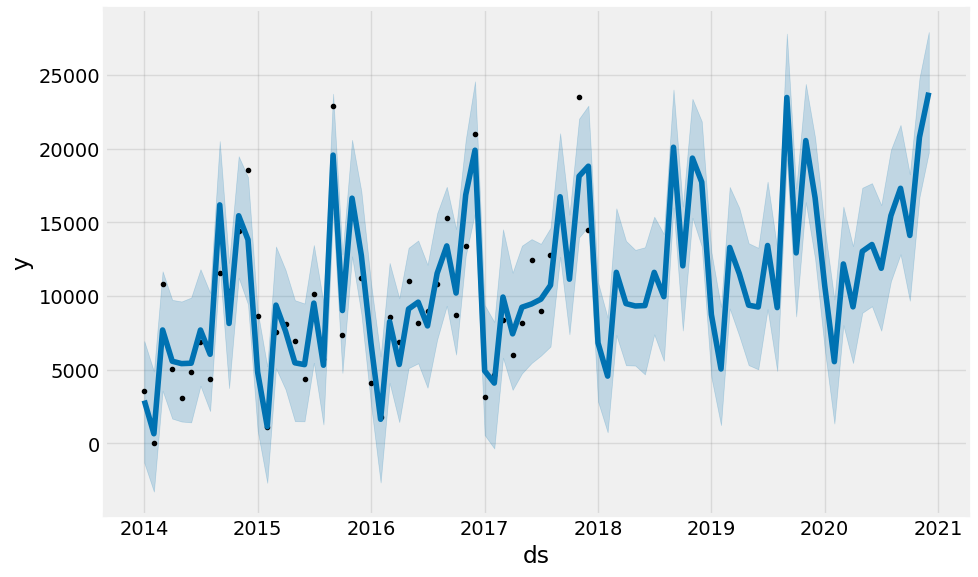

In [84]:
model.plot(forecast,uncertainty=True);

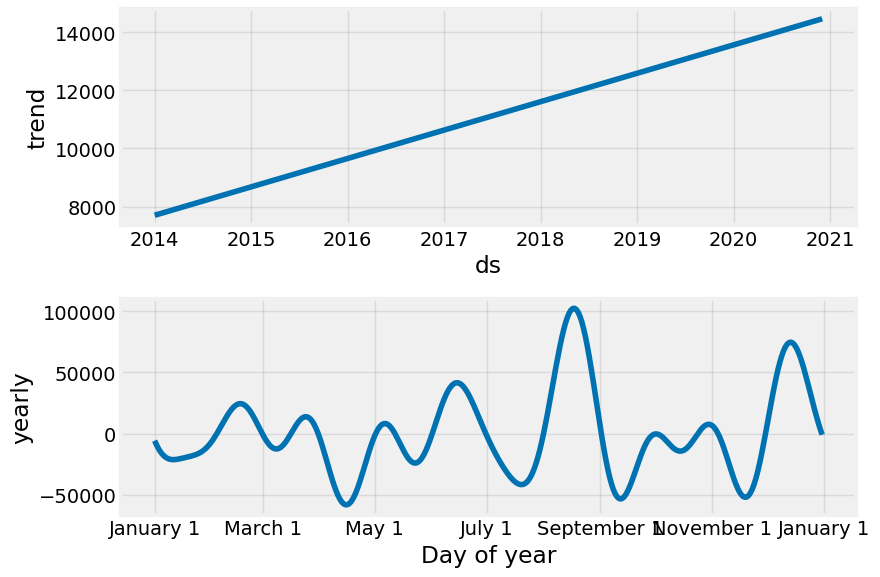

In [85]:
model.plot_components(forecast);